# Set up

In [1]:
!pip install fastcluster

     |████████████████████████████████| 163kB 8.9MB/s 


In [0]:
#!pip install hdbscan

In [0]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats
from datetime import datetime
import itertools
import tensorflow as tf
from tensorflow import keras

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import fastcluster
#import hdbscan
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [4]:
link='https://raw.githubusercontent.com/aapatel09/handson-unsupervised-learning/master/datasets/lending_club_data/LoanStats3a.csv'
data_a=pd.read_csv(link)
print(data_a.shape)
data_a.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.



(42542, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columnsToKeep = ['loan_amnt','funded_amnt','funded_amnt_inv','term', \
'int_rate','installment', \
'emp_length','home_ownership','annual_inc', \
'verification_status','pymnt_plan','purpose', \
'addr_state','dti','delinq_2yrs','earliest_cr_line', \
'mths_since_last_delinq','mths_since_last_record', \
'open_acc','pub_rec','revol_bal','revol_util', \
'total_acc','initial_list_status','out_prncp', \
'out_prncp_inv','total_pymnt','total_pymnt_inv', \
'total_rec_prncp','total_rec_int','total_rec_late_fee',
\
'recoveries','collection_recovery_fee','last_pymnt_d', \
'last_pymnt_amnt','loan_status','grade','sub_grade']

In [6]:
data = data_a.loc[:,columnsToKeep]
print(data.shape)
data.head()

(42542, 38)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,loan_status,grade,sub_grade
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,Fully Paid,B,B2
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Charged Off,C,C4
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Fully Paid,C,C5
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Fully Paid,C,C1
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Fully Paid,B,B5


In [7]:
data['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

The loan status indicates where your loan is in the process. Some statuses include in-school, grace, repayment, and forbearance.

Transform features from string to numeric

In [8]:
# Transform features from string to numeric
for i in ["term","int_rate","emp_length","revol_util"]:
  data.loc[:,i] = data.loc[:,i].apply(lambda x: re.sub("[^0-9]", "", str(x)))
  data.loc[:,i] = pd.to_numeric(data.loc[:,i])
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,loan_status,grade,sub_grade
0,5000.0,5000.0,4975.0,36.0,1065.0,162.87,10.0,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,NaN,NaN,3.0,0.0,13648.0,8370.0,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,Fully Paid,B,B2
1,2500.0,2500.0,2500.0,60.0,1527.0,59.83,1.0,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,NaN,NaN,3.0,0.0,1687.0,940.0,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Charged Off,C,C4
2,2400.0,2400.0,2400.0,36.0,1596.0,84.33,10.0,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,NaN,NaN,2.0,0.0,2956.0,9850.0,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Fully Paid,C,C5
3,10000.0,10000.0,10000.0,36.0,1349.0,339.31,10.0,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Fully Paid,C,C1
4,3000.0,3000.0,3000.0,60.0,1269.0,67.79,1.0,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,NaN,15.0,0.0,27783.0,5390.0,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Fully Paid,B,B5


In [9]:
data.dtypes

loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                       float64
int_rate                   float64
installment                float64
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
pymnt_plan                  object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                float64
earliest_cr_line            object
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

# Deal with null 

map() is for Series (i.e. single columns) and operates on one cell at a time, while apply() is for DataFrame, and operates on a whole row at a time

In [10]:
data.isnull().sum()

loan_amnt                      7
funded_amnt                    7
funded_amnt_inv                7
term                           7
int_rate                       7
installment                    7
emp_length                  1119
home_ownership                 7
annual_inc                    11
verification_status            7
pymnt_plan                     7
purpose                        7
addr_state                     7
dti                            7
delinq_2yrs                   36
earliest_cr_line              36
mths_since_last_delinq     26933
mths_since_last_record     38891
open_acc                      36
pub_rec                       36
revol_bal                      7
revol_util                    97
total_acc                     36
initial_list_status            7
out_prncp                      7
out_prncp_inv                  7
total_pymnt                    7
total_pymnt_inv                7
total_rec_prncp                7
total_rec_int                  7
total_rec_

In [11]:
print(data['last_pymnt_d'].head())
data.drop(columns='last_pymnt_d',inplace=True) 
# drop due to format is hard to change: jun-15

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    Jan-17
Name: last_pymnt_d, dtype: object


In [0]:
data.drop(columns=['mths_since_last_delinq','mths_since_last_record'],inplace=True)
# drop due to very large null

In [0]:
data.dropna(inplace=True)
# drop others due to small, no need to impute

In [0]:
data.drop(columns='earliest_cr_line',inplace=True) 
# drop due to format is hard to change: jun-15

In [15]:
data.shape

(41336, 34)

In [16]:
data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
loan_status                0
grade                      0
sub_grade                  0
dtype: int64

In [0]:
X=data.drop(columns='grade')
y=data['grade']

# Deal with category


Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. A score can also be applied to a portfolio of loans. Loan grading is part of a lending institution's loan review or credit risk system and is usually an aspect of the credit underwriting and approval processes.

In [18]:
X.select_dtypes(include='object')

,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,loan_status,sub_grade
0,RENT,Verified,n,credit_card,AZ,f,Fully Paid,B2
1,RENT,Source Verified,n,car,GA,f,Charged Off,C4
2,RENT,Not Verified,n,small_business,IL,f,Fully Paid,C5
3,RENT,Source Verified,n,other,CA,f,Fully Paid,C1
4,RENT,Source Verified,n,other,OR,f,Fully Paid,B5
...,...,...,...,...,...,...,...,...
42510,RENT,Not Verified,n,credit_card,NY,f,Does not meet the credit policy. Status:Fully ...,D5
42513,RENT,Not Verified,n,educational,GA,f,Does not meet the credit policy. Status:Fully ...,E5
42514,MORTGAGE,Not Verified,n,debt_consolidation,CT,f,Does not meet the credit policy. Status:Fully ...,A1
42515,RENT,Not Verified,n,debt_consolidation,CT,f,Does not meet the credit policy. Status:Fully ...,C2


In [0]:
X.drop(columns=['pymnt_plan','initial_list_status'],inplace=True)
# drop due to only 1 value

In [0]:
X.drop(columns='sub_grade',inplace=True)

In [21]:
for name in X.select_dtypes(include='object').columns:
  print('----',name,'----')
  print(X[name].value_counts())

---- home_ownership ----
RENT        19701
MORTGAGE    18475
OWN          3022
OTHER         134
NONE            4
Name: home_ownership, dtype: int64
---- verification_status ----
Not Verified       18247
Verified           12995
Source Verified    10094
Name: verification_status, dtype: int64
---- purpose ----
debt_consolidation    19347
credit_card            5341
other                  4217
home_improvement       3096
major_purchase         2231
small_business         1945
car                    1559
wedding                 990
medical                 724
moving                  600
house                   411
educational             410
vacation                367
renewable_energy         98
Name: purpose, dtype: int64
---- addr_state ----
CA    7231
NY    3947
FL    3007
TX    2851
NJ    1953
IL    1631
PA    1610
GA    1461
VA    1455
MA    1401
OH    1291
MD    1104
AZ     882
WA     852
CO     833
NC     802
CT     793
MI     761
MO     738
MN     627
NV     510
WI     499
SC  

## One hot encoder

In [22]:
one_hot_encoder=X.select_dtypes(include='object').columns
one_hot_encoder

Index(['home_ownership', 'verification_status', 'purpose', 'addr_state',
       'loan_status'],
      dtype='object')

In [23]:
X.loc[:,one_hot_encoder]

,home_ownership,verification_status,purpose,addr_state,loan_status
0,RENT,Verified,credit_card,AZ,Fully Paid
1,RENT,Source Verified,car,GA,Charged Off
2,RENT,Not Verified,small_business,IL,Fully Paid
3,RENT,Source Verified,other,CA,Fully Paid
4,RENT,Source Verified,other,OR,Fully Paid
...,...,...,...,...,...
42510,RENT,Not Verified,credit_card,NY,Does not meet the credit policy. Status:Fully ...
42513,RENT,Not Verified,educational,GA,Does not meet the credit policy. Status:Fully ...
42514,MORTGAGE,Not Verified,debt_consolidation,CT,Does not meet the credit policy. Status:Fully ...
42515,RENT,Not Verified,debt_consolidation,CT,Does not meet the credit policy. Status:Fully ...


In [0]:
data_dummy=pd.get_dummies(X.loc[:,one_hot_encoder])
data_dummy=data_dummy.astype('int64')

In [0]:
X.drop(columns=one_hot_encoder,inplace=True)

In [26]:
X=pd.concat([data_dummy,X,],axis=1)
X

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,...,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,loan_status_Charged Off,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5000.0,5000.0,4975.0,36.0,1065.0,162.87,10.0,24000.0,27.65,0.0,3.0,0.0,13648.0,8370.0,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,171.62
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2500.0,2500.0,2500.0,60.0,1527.0,59.83,1.0,30000.0,1.00,0.0,3.0,0.0,1687.0,940.0,4.0,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,119.66
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2400.0,2400.0,2400.0,36.0,1596.0,84.33,10.0,12252.0,8.72,0.0,2.0,0.0,2956.0,9850.0,10.0,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,649.91
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10000.0,10000.0,10000.0,36.0,1349.0,339.31,10.0,49200.0,20.00,0.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,357.48
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3000.0,3000.0,3000.0,60.0,1269.0,67.79,1.0,80000.0,17.94,0.0,15.0,0.0,27783.0,5390.0,38.0,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,67.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42510,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6000.0,6000.0,1200.0,36.0,1312.0,202.51,2.0,12000.0,4.40,0.0,15.0,0.0,5251.0,4930.0,16.0,0.0,0.0,7290.237811,1458.05,6000.00,1290.24,0.00,0.0,0.00,204.65
42513,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10000.0,10000.0,350.0,36.0,1470.0,345.18,1.0,50000.0,7.22,2.0,14.0,0.0,10025.0,85.0,20.0,0.0,0.0,12622.317950,441.78,10000.00,2570.54,51.78,0.0,0.00,1605.65
42514,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2000.0,2000.0,1275.0,36.0,712.0,61.87,7.0,150000.0,5.60,0.0,7.0,0.0,150786.0,220.0,16.0,0.0,0.0,2227.023184,1419.73,2000.00,227.02,0.00,0.0,0.00,63.59
42515,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6000.0,6000.0,650.0,36.

In [27]:
X.dtypes

home_ownership_MORTGAGE      int64
home_ownership_NONE          int64
home_ownership_OTHER         int64
home_ownership_OWN           int64
home_ownership_RENT          int64
                            ...   
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
Length: 101, dtype: object

## No feature engineer here

# Split X and y, transform y

## y label encoder

In [28]:
y

0        B
1        C
2        C
3        C
4        B
        ..
42510    D
42513    E
42514    A
42515    C
42516    B
Name: grade, Length: 41336, dtype: object

In [29]:
lab=LabelEncoder()
y_label_encoder=lab.fit_transform(y)
y_label_encoder

array([1, 2, 2, ..., 0, 2, 1])

In [30]:
lab.inverse_transform(y_label_encoder)

array(['B', 'C', 'C', ..., 'A', 'C', 'B'], dtype=object)

In [31]:
y_label_encoder = pd.Series(y_label_encoder)
y_label_encoder

0        1
1        2
2        2
3        2
4        1
        ..
41331    3
41332    4
41333    0
41334    2
41335    1
Length: 41336, dtype: int64

## y one hot encoder

In [32]:
y_one_hot=pd.get_dummies(y)
y_one_hot

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
42510,0,0,0,1,0,0,0
42513,0,0,0,0,1,0,0
42514,1,0,0,0,0,0,0
42515,0,0,1,0,0,0,0


#STOP HERE

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label_encoder, test_size=0.2,
                                                    #shuffle=True ,
                                                    stratify=y,random_state=123)

In [0]:
y_train.value_counts(normalize=True)

1    0.291067
0    0.236543
2    0.206574
3    0.142162
4    0.080592
5    0.030785
6    0.012278
dtype: float64

In [0]:
y_test.value_counts(normalize=True)

1    0.291122
0    0.236575
2    0.206580
3    0.142114
4    0.080552
5    0.030842
6    0.012216
dtype: float64

# StandardScaler

In [0]:
sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train)
X_test_tran=sc.fit_transform(X_test)

In [0]:
X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)

In [0]:
y_train

20056    3
15960    4
13224    1
8022     1
12169    2
        ..
28038    1
41293    3
24487    2
6821     0
31983    0
Length: 33068, dtype: int64

Stop hear

# PCA

In [0]:
n_components = 101
#whiten = False It is default False
random_state = 2018

pca = PCA(n_components=n_components,random_state=random_state)

X_train_PCA = pca.fit_transform(X_train_tran)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,7.048380,-0.594186,0.645009,-0.006756,-0.174117,-0.900106,1.249270,2.190245,-0.554037,-0.694742,-0.498724,-0.675931,0.490324,-0.035265,0.648179,0.581313,-0.119964,1.730286,-0.104277,0.134230,-0.553420,1.623040,-1.167240,0.542434,-0.094374,0.456652,2.052006,0.750270,0.551789,0.315017,1.971105,1.115542,-0.772740,-1.239470,-0.610354,1.593922,-0.111412,-0.205813,0.282529,0.123350,...,-0.626797,-0.845205,-0.048508,-0.622412,-0.476138,0.884003,0.341171,0.295945,0.242141,0.277716,-0.650582,-0.288279,0.762398,0.130202,0.202765,-0.206874,0.424960,-0.386645,0.833438,0.097630,0.792749,0.778591,-0.188203,0.468293,-0.811673,-0.811824,0.261339,-0.027317,-0.283876,-0.000622,0.086195,0.051333,2.888484e-07,9.618840e-13,-1.417721e-14,-2.976248e-14,8.298226e-15,-6.466619e-15,-2.531616e-16,-4.820172e-16
1,0.331822,0.516088,0.697020,-0.955965,-2.272838,-0.162771,-1.306472,0.318246,-1.981653,-0.849353,2.044513,0.036257,-0.076157,1.109843,-0.957037,0.970072,0.729131,-0.377000,-0.978196,-0.052104,-0.836166,-0.532889,-1.557045,0.794651,0.791212,-0.220536,0.451172,0.552615,0.303744,-2.339659,-1.284773,-0.722657,-0.302315,-1.080481,0.852316,0.035333,-0.371842,-0.227949,0.019046,-0.467488,...,0.716312,-0.334305,0.013817,-0.238701,-0.466594,-0.416371,0.694332,-0.995165,0.075515,-0.868522,-0.221886,-1.377920,-0.942389,-0.915165,0.622607,1.451605,0.704453,0.221832,0.577822,-0.766460,-0.427863,0.698386,0.564040,-0.372259,0.066723,0.849955,-0.449688,-0.223407,0.518661,-0.059510,0.002472,0.012851,6.510879e-08,-7.412554e-15,1.406792e-14,-7.696031e-15,-7.157268e-16,1.938378e-15,6.966798e-18,1.179663e-16
2,-1.408631,-0.139857,-0.351813,-2.992803,0.571844,1.215321,0.188189,0.482720,1.216535,0.124347,0.443700,1.309314,-0.728568,0.856691,-0.367177,0.491356,-0.040054,0.387825,-0.043905,0.010996,0.232556,-0.074165,-0.267099,-0.483692,-0.385596,-0.227130,-0.068555,-0.035845,-0.063034,-0.182669,-0.082595,-0.093523,-0.002225,-0.168704,0.270880,-0.017731,-0.307007,0.195033,-0.053629,0.126330,...,0.063160,-0.133043,-0.118829,-0.087387,-0.094632,-0.202081,-0.069446,0.002120,-0.129090,0.157401,0.029246,0.709712,-0.068228,0.390669,0.381104,0.029737,-0.397474,0.238958,0.092153,0.663298,-0.647749,-0.338774,-0.010021,-1.005163,1.483714,-0.266133,0.113413,-0.048008,-0.109695,0.004367,0.031982,0.011800,-3.574946e-07,-2.898761e-14,-1.983802e-15,9.404395e-15,9.206049e-16,1.637342e-14,1.263678e-16,6.733491e-16
3,-3.095473,-0.052310,0.638196,-3.074416,-0.012796,1.446681,0.224782,-0.071816,0.479502,-0.319898,1.233801,1.766486,-1.346683,1.144390,-0.660694,0.177319,-0.008131,0.326055,-0.026377,0.224530,0.457274,-0.214363,-0.436716,-0.214019,-0.699733,-0.563716,-0.109946,-0.435452,-0.098802,-0.138288,-0.131382,-0.055985,0.035065,-0.171415,0.292273,0.285287,-0.383152,-0.019369,-0.057609,-0.074304,...,0.128189,-0.298115,-0.134058,-0.012093,-0.057898,-0.143335,0.137350,-0.117003,-0.360389,0.107018,-0.615131,0.221368,-0.017659,-0.102483,0.334138,0.456629,-0.033497,-0.461463,-1.070338,0.676328,0.139166,-0.159042,-0.403476,-0.213633,-0.254462,-0.110079,0.119141,-0.016752,-0.176468,0.040238,0.061880,0.018524,-2.283464e-07,2.413448e-13,2.917371e-14,1.210673e-13,-3.335275e-14,2.829541e-14,1.035671e-15,2.030230e-15
4,0.463729,-0.541536,1.186855,0.676117,0.455516,-1.418054,0.653480,1.291444,1.041392,0.030119,0.517337,3.290092,-1.025526,0.301780,0.842208,1.373473,-0.731076,0.330407,-0.072275,1.197921,-0.232178,0.123176,0.467054,-0.535699,-0.185248,0.426805,-0.278814,0.062566,-0.567722,-0.112332,0.224729,0.132456,-0.018661,0.081043,0.204955,-0.499939,-0.116096,0.227253,-0.102725,0.004558,...,-0.071140,0.100338,-0.884900,-0.313970,-0.007910,-0.307247,0.180423,0.326229,-0.040047,0.386504,0.430691,0.735656,0.097505,0.274726,-0.760789,0.642893,-0.314464,-0.898397,0.246329

In [0]:
df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variant'])
df["cumpercentage"] = df['variant'].cumsum()/df['variant'].sum()*100
df.head()

,variant,cumpercentage
0,0.085154,8.515439
1,0.028184,11.333835
2,0.026221,13.955968
3,0.018994,15.855381
4,0.016733,17.528656


In [0]:
trace1 = dict(type='bar',
    x=df.index,
    y=df['variant'],
    marker=dict(
        color='#2ECC71'
    ),
    name='Number of components',
    opacity=0.8
)

trace2 = dict(type='scatter',
    x=df.index,
    y=df['cumpercentage'],
    marker=dict(color='#29B6F6'),
    line=dict(color= '#29B6F6', width= 1.5),
    name='Cumulative % of Players',
    xaxis='x1', 
    yaxis='y2' 
    )

a= [trace1, trace2]

layout = go.Layout(
    title='Pareto Analysis',
    legend= dict(orientation="h"),
    xaxis=dict(
        title='Number of component',
        titlefont=dict(
            color="#2ECC71")   
              ),
    yaxis=dict(
        title='Variant',  
              ),
    yaxis2=dict(
        title='Cumulative % of component',
        titlefont=dict(
            color='#29B6F6'),
        range=[0,105],
        overlaying='y',
        anchor='x',
        side='right'
                )
      )

fig = go.Figure(data=a, layout=layout)
fig
#iplot(fig, filename="pareto")

Method 2 PCA

In [0]:
cumpercentage=0.95
pca = PCA(n_components=cumpercentage,random_state=random_state)

X_train_PCA = pca.fit_transform(X_train_tran)
X_train_PCA = pd.DataFrame(data=X_train_PCA)
print(X_train_PCA.shape)
X_train_PCA.head()

(33068, 79)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,7.048380,-0.594186,0.645009,-0.006756,-0.174117,-0.900106,1.249270,2.190245,-0.554037,-0.694742,-0.498724,-0.675931,0.490324,-0.035265,0.648179,0.581313,-0.119964,1.730286,-0.104277,0.134230,-0.553420,1.623040,-1.167240,0.542434,-0.094374,0.456652,2.052006,0.750270,0.551789,0.315017,1.971105,1.115542,-0.772740,-1.239470,-0.610354,1.593922,-0.111412,-0.205813,0.282529,0.123350,0.322293,-0.223967,-0.231956,0.134793,-0.015800,0.158983,0.237408,-0.042442,0.088207,-0.063953,0.252597,0.245207,-0.000885,-0.121505,-0.016788,-0.231381,0.270830,0.517406,-0.369643,-0.231572,0.115026,-0.626797,-0.845205,-0.048508,-0.622412,-0.476138,0.884003,0.341171,0.295945,0.242141,0.277716,-0.650582,-0.288279,0.762398,0.130202,0.202765,-0.206874,0.424960,-0.386645
1,0.331822,0.516088,0.697020,-0.955965,-2.272838,-0.162771,-1.306472,0.318246,-1.981653,-0.849353,2.044513,0.036257,-0.076157,1.109843,-0.957037,0.970072,0.729131,-0.377000,-0.978196,-0.052104,-0.836166,-0.532889,-1.557045,0.794651,0.791212,-0.220536,0.451172,0.552615,0.303744,-2.339659,-1.284773,-0.722657,-0.302315,-1.080481,0.852316,0.035333,-0.371842,-0.227949,0.019046,-0.467488,0.608172,-0.878338,0.064224,0.097449,-0.708714,0.127628,0.133160,0.369403,0.483575,-0.166816,0.073723,-0.063896,0.105118,-0.029426,-0.415457,-0.110756,-0.195789,-0.605777,-0.877649,0.332288,-0.318048,0.716312,-0.334305,0.013817,-0.238701,-0.466594,-0.416371,0.694332,-0.995165,0.075515,-0.868522,-0.221886,-1.377920,-0.942389,-0.915165,0.622607,1.451605,0.704453,0.221832
2,-1.408631,-0.139857,-0.351813,-2.992803,0.571844,1.215321,0.188189,0.482720,1.216535,0.124347,0.443700,1.309314,-0.728568,0.856691,-0.367177,0.491356,-0.040054,0.387825,-0.043905,0.010996,0.232556,-0.074165,-0.267099,-0.483692,-0.385596,-0.227130,-0.068555,-0.035845,-0.063034,-0.182669,-0.082595,-0.093523,-0.002225,-0.168704,0.270880,-0.017731,-0.307007,0.195033,-0.053629,0.126330,-0.115293,0.033029,0.148017,0.060928,0.122668,0.054361,-0.085636,-0.076674,0.107447,0.192242,-0.080124,-0.069274,0.053718,-0.127834,-0.160274,0.116328,0.083366,-0.151552,0.033616,0.030719,0.013728,0.063160,-0.133043,-0.118829,-0.087387,-0.094632,-0.202081,-0.069446,0.002120,-0.129090,0.157401,0.029246,0.709712,-0.068228,0.390669,0.381104,0.029737,-0.397474,0.238958
3,-3.095473,-0.052310,0.638196,-3.074416,-0.012796,1.446681,0.224782,-0.071816,0.479502,-0.319898,1.233801,1.766486,-1.346683,1.144390,-0.660694,0.177319,-0.008131,0.326055,-0.026377,0.224530,0.457274,-0.214363,-0.436716,-0.214019,-0.699733,-0.563716,-0.109946,-0.435452,-0.098802,-0.138288,-0.131382,-0.055985,0.035065,-0.171415,0.292273,0.285287,-0.383152,-0.019369,-0.057609,-0.074304,0.128392,0.035479,0.060703,0.117419,-0.039703,0.110987,-0.067281,0.003920,0.067914,0.087719,0.025793,0.013785,0.037535,-0.155588,-0.204280,0.117375,0.244330,-0.179779,-0.030162,0.403206,-0.103783,0.128189,-0.298115,-0.134058,-0.012093,-0.057898,-0.143335,0.137350,-0.117003,-0.360389,0.107018,-0.615131,0.221368,-0.017659,-0.102483,0.334138,0.456629,-0.033497,-0.461463
4,0.463729,-0.541536,1.186855,0.676117,0.455516,-1.418054,0.653480,1.291444,1.041392,0.030119,0.517337,3.290092,-1.025526,0.301780,0.842208,1.373473,-0.731076,0.330407,-0.072275,1.197921,-0.232178,0.123176,0.467054,-0.535699,-0.185248,0.426805,-0.278814,0.062566,-0.567722,-0.112332,0.224729,0.132456,-0.018661,0.081043,0.204955,-0.499939,-0.116096,0.227253,-0.102725,0.004558,0.032811,-0.203928,0.075406,0.081230,-0.167891,-0.185767,0.023542,-0.016358,0.102784,0.123219,-0.167048,-0.209160,0.150907,0.314321,-0.016198,0.310809,-0.191671,-0.467090,-0.117312,-0.841286,0.162305,-0.071140,0.100338,-0.884900,-0.313970,-0.007910,-0.307247,0.180423,0.326229,-0.040047,0.386504,0.430691,0.735656,0.097505,0.274726,-0.760789,0.642893,-0.314464,-0.898397


# Classification spot check

## X_train_PCA (poor)

In [0]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),     #Long 
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    'NB':GaussianNB(),
    #'SVC':SVC(), # Long
    #Ensemble:
    #'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
}


In [0]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train_PCA, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


LR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

KeyboardInterrupt: ignored

In [0]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

In [0]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

In [0]:
X_train_PCA.shape

In [0]:
X_train_tran.shape

## X_train_tran

In [0]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),     #Long 
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    'NB':GaussianNB(),
    #'SVC':SVC(), # Long
    #Ensemble:
    #'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
}


In [0]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train_tran, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


LR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

time : 18.602 

LR: train_acc: 0.72 train_rec_macro: 0.72 train_prec_macro: 0.76   test_acc: 0.70 test_rec_macro: 0.70 test_prec_macro: 0.73   fit_time: 3.58
LDA
time : 3.797 

LDA: train_acc: 0.70 train_rec_macro: 0.70 train_prec_macro: 0.72   test_acc: 0.69 test_rec_macro: 0.69 test_prec_macro: 0.70   fit_time: 0.62
CART
time : 4.016 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.91 test_rec_macro: 0.91 test_prec_macro: 0.91   fit_time: 0.71
NB
time : 1.255 

NB: train_acc: 0.17 train_rec_macro: 0.17 train_prec_macro: 0.31   test_acc: 0.16 test_rec_macro: 0.16 test_prec_macro: 0.25   fit_time: 0.06
XGB
time : 227.475 

XGB: train_acc: 0.84 train_rec_macro: 0.84 train_prec_macro: 0.91   test_acc: 0.83 test_rec_macro: 0.83 test_prec_macro: 0.90   fit_time: 44.66
LGBM
time : 71.452 

LGBM: train_acc: 0.99 train_rec_macro: 0.99 train_prec_macro: 1.00   test_acc: 0.89 test_rec_macro: 0.89 test_prec_macro: 0.93   fit_time: 13.17


In [0]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
2,CART,0.909208,0.909208,0.914443,0.911526,1.000000,1.000000,1.000000,1.000000,0.706494,4.015565
5,LGBM,0.893377,0.893377,0.927121,0.908228,0.992800,0.992800,0.995111,0.993933,13.166407,71.452199
4,XGB,0.827377,0.827377,0.898342,0.855496,0.843904,0.843904,0.913544,0.871975,44.659761,227.474529
0,LR,0.696976,0.696976,0.733957,0.712245,0.722561,0.722561,0.762921,0.739517,3.578969,18.602498
1,LDA,0.687821,0.687821,0.702701,0.694283,0.703698,0.703698,0.716664,0.709587,0.621208,3.797406
3,NB,0.162943,0.162943,0.251346,0.046900,0.171206,0.171206,0.306005,0.051631,0.061089,1.254927


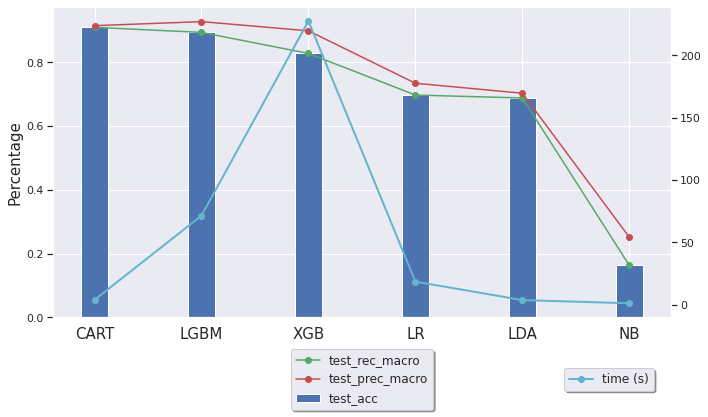

In [0]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

# Final classification (no PCA)

## Grid Search CV DT

In [0]:
DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
params = {
     'min_samples_split': [2, 4, 6],
     'criterion' : ['gini', 'entropy'],
      'max_depth' : [2,4,8,'None']
     }
model=DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params,scoring='f1_macro', verbose=2, cv=5)
grid_search_cv.fit(X_train_tran, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV] . criterion=gini, max_depth=2, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . criterion=gini, max_depth=2, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV] . criterion=gini, max_depth=2, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV] . criterion=gini, max_depth=2, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV] . criterion=gini, max_depth=2, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=4 ................
[CV] . criterion=gini, max_depth=2, min_samples_split=4, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=4 ................
[CV] . criterion=gini, max_depth=2, min_samples_split=4, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=4 ................
[CV] . criterion=gini, max_depth=2, min_samples_split=4, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=4 ................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-tes

[CV]  criterion=gini, max_depth=None, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=6 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=6 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=6 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=6 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-tes

[CV]  criterion=entropy, max_depth=2, min_samples_split=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 ......

KeyboardInterrupt: ignored

In [0]:
# Printing the best score and best parameters
print("Best: %f using %s" % (grid_search_cv.best_score_, 
    grid_search_cv.best_params_))

In [0]:
# estimate accuracy on validation dataset
y_predict = grid_search_cv.predict(X_test_tran)
y_pred_probs = grid_search_cv.predict_proba(X_test_tran)
y_pred_bin = grid_search_cv.predict(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

## DT

In [0]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_tran, y_train)
y_predict = model.predict(X_test_tran)
y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.8238993710691824
confusion_matrix 
 [[1877   77    2    0    0    0    0]
 [   5 2208  188    6    0    0    0]
 [   0   88 1448   96   76    0    0]
 [   0    3   81  797  234   23   37]
 [   0    0   21  135  274  194   42]
 [   0    0    0   15   47  132   61]
 [   0    0    0    1    6   18   76]]
classification_report 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98      1956
           2       0.93      0.92      0.92      2407
           3       0.83      0.85      0.84      1708
           4       0.76      0.68      0.72      1175
           5       0.43      0.41      0.42       666
           6       0.36      0.52      0.42       255
           7       0.35      0.75      0.48       101

    accuracy                           0.82      8268
   macro avg       0.67      0.73      0.68      8268
weighted avg       0.84      0.82      0.83      8268



In [0]:
model=OneVsRestClassifier(DecisionTreeClassifier(random_state=42)) #Default
#Multiclass_model = DecisionTreeClassifier(multi_class='ovr')
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.8067247218190614
confusion_matrix 
 [[1875   76    2    0    1    0    2]
 [   2 2196  176    3    0    0   30]
 [   0   70 1403  109   20    0  106]
 [   0    0   71  707  170   66  161]
 [   0    0    7  109  266  129  155]
 [   0    0    1    4   31  137   82]
 [   0    0    0    0    2   13   86]]
classification_report 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98      1956
           2       0.94      0.91      0.92      2407
           3       0.85      0.82      0.83      1708
           4       0.76      0.60      0.67      1175
           5       0.54      0.40      0.46       666
           6       0.40      0.54      0.46       255
           7       0.14      0.85      0.24       101

    accuracy                           0.81      8268
   macro avg       0.66      0.73      0.65      8268
weighted avg       0.85      0.81      0.82      8268



In [0]:
model=OneVsOneClassifier(DecisionTreeClassifier(random_state=42))
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.8476052249637155
confusion_matrix 
 [[1905   48    3    0    0    0    0]
 [   6 2201  190   10    0    0    0]
 [   0   89 1446  127   46    0    0]
 [   1    1   96  805  220   52    0]
 [   0    0   10  130  380  137    9]
 [   0    0    4    8   26  190   27]
 [   0    0    0    0    3   17   81]]
classification_report 
               precision    recall  f1-score   support

           1       1.00      0.97      0.99      1956
           2       0.94      0.91      0.93      2407
           3       0.83      0.85      0.84      1708
           4       0.75      0.69      0.71      1175
           5       0.56      0.57      0.57       666
           6       0.48      0.75      0.58       255
           7       0.69      0.80      0.74       101

    accuracy                           0.85      8268
   macro avg       0.75      0.79      0.77      8268
weighted avg       0.85      0.85      0.85      8268



## NB

In [0]:
model=GaussianNB() 
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.13691340106434446
confusion_matrix 
 [[   0    0    0 1134  822    0    0]
 [   0    1    0 1857  549    0    0]
 [   0    1    0 1284  423    0    0]
 [   0    0    0  723  452    0    0]
 [   0    0    0  258  408    0    0]
 [   0    0    0   43  212    0    0]
 [   0    0    0   10   91    0    0]]
classification_report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1956
           2       0.50      0.00      0.00      2407
           3       0.00      0.00      0.00      1708
           4       0.14      0.62      0.22      1175
           5       0.14      0.61      0.23       666
           6       0.00      0.00      0.00       255
           7       0.00      0.00      0.00       101

    accuracy                           0.14      8268
   macro avg       0.11      0.18      0.06      8268
weighted avg       0.18      0.14      0.05      8268



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [0]:
model=OneVsRestClassifier(GaussianNB()) #Default
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.012215771649733915
confusion_matrix 
 [[   0    0    0    0    0    0 1956]
 [   0    0    0    0    0    0 2407]
 [   0    0    0    0    0    0 1708]
 [   0    0    0    0    0    0 1175]
 [   0    0    0    0    0    0  666]
 [   0    0    0    0    0    0  255]
 [   0    0    0    0    0    0  101]]
classification_report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1956
           2       0.00      0.00      0.00      2407
           3       0.00      0.00      0.00      1708
           4       0.00      0.00      0.00      1175
           5       0.00      0.00      0.00       666
           6       0.00      0.00      0.00       255
           7       0.01      1.00      0.02       101

    accuracy                           0.01      8268
   macro avg       0.00      0.14      0.00      8268
weighted avg       0.00      0.01      0.00      8268



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [0]:
model=OneVsOneClassifier(GaussianNB())
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.13703434929850025
confusion_matrix 
 [[   0    0    0 1134  822    0    0]
 [   0    1    0 1857  549    0    0]
 [   0    0    1 1284  423    0    0]
 [   0    0    0  723  452    0    0]
 [   0    0    0  258  408    0    0]
 [   0    0    0   43  212    0    0]
 [   0    0    0   10   91    0    0]]
classification_report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1956
           2       1.00      0.00      0.00      2407
           3       1.00      0.00      0.00      1708
           4       0.14      0.62      0.22      1175
           5       0.14      0.61      0.23       666
           6       0.00      0.00      0.00       255
           7       0.00      0.00      0.00       101

    accuracy                           0.14      8268
   macro avg       0.32      0.18      0.06      8268
weighted avg       0.53      0.14      0.05      8268



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## SVC

In [0]:
model=SVC() 
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.7962022254475085
confusion_matrix 
 [[1844  109    2    1    0    0    0]
 [  44 2188  172    3    0    0    0]
 [   3  174 1374  152    5    0    0]
 [   3   19  249  792  112    0    0]
 [   0   12   23  292  327   11    1]
 [   0    2    6   35  158   52    2]
 [   0    1    4    5   41   44    6]]
classification_report 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96      1956
           2       0.87      0.91      0.89      2407
           3       0.75      0.80      0.78      1708
           4       0.62      0.67      0.65      1175
           5       0.51      0.49      0.50       666
           6       0.49      0.20      0.29       255
           7       0.67      0.06      0.11       101

    accuracy                           0.80      8268
   macro avg       0.70      0.58      0.60      8268
weighted avg       0.79      0.80      0.79      8268



In [0]:
model=OneVsOneClassifier(SVC() )
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

## Logistic regression

In [0]:
model=LogisticRegression(random_state=42)
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.8341799709724238
confusion_matrix 
 [[1895   61    0    0    0    0    0]
 [  40 2220  147    0    0    0    0]
 [   0  111 1434  163    0    0    0]
 [   2    0  188  831  152    2    0]
 [   0    0    5  247  359   55    0]
 [   0    0    0    2  122  109   22]
 [   0    0    0    0    2   50   49]]
classification_report 
               precision    recall  f1-score   support

           1       0.98      0.97      0.97      1956
           2       0.93      0.92      0.93      2407
           3       0.81      0.84      0.82      1708
           4       0.67      0.71      0.69      1175
           5       0.57      0.54      0.55       666
           6       0.50      0.43      0.46       255
           7       0.69      0.49      0.57       101

    accuracy                           0.83      8268
   macro avg       0.73      0.70      0.71      8268
weighted avg       0.83      0.83      0.83      8268



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



One-Vs-Rest for Multi-Class Classification
One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

For example, given a multi-class classification problem with examples for each class ‘red,’ ‘blue,’ and ‘green‘. This could be divided into three binary classification datasets as follows:

Binary Classification Problem 1: red vs [blue, green]

Binary Classification Problem 2: blue vs [red, green]

Binary Classification Problem 3: green vs [red, blue]

In [0]:
from sklearn.multiclass import OneVsRestClassifier
model=LogisticRegression(random_state=42)
ovr = OneVsRestClassifier(model)
#Multiclass_model = LogisticRegression(multi_class='ovr')
ovr.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = ovr.predict(X_test_tran)
y_pred_probs = ovr.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



accuracy_score: 
 0.673681664247702
confusion_matrix 
 [[1920   36    0    0    0    0    0]
 [  68 2274   64    1    0    0    0]
 [   0  904  724   79    1    0    0]
 [   2   81  585  408   99    0    0]
 [   0    3  156  303  197    7    0]
 [   0    0    7  104  117   22    5]
 [   0    0    0   19   38   19   25]]
classification_report 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      1956
           2       0.69      0.94      0.80      2407
           3       0.47      0.42      0.45      1708
           4       0.45      0.35      0.39      1175
           5       0.44      0.30      0.35       666
           6       0.46      0.09      0.15       255
           7       0.83      0.25      0.38       101

    accuracy                           0.67      8268
   macro avg       0.61      0.48      0.50      8268
weighted avg       0.65      0.67      0.65      8268



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



One-vs-One (OvO for short) is another heuristic method for using binary classification algorithms for multi-class classification.

Like one-vs-rest, one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

For example, consider a multi-class classification problem with four classes: ‘red,’ ‘blue,’ and ‘green,’ ‘yellow.’ This could be divided into six binary classification datasets as follows:

Binary Classification Problem 1: red vs. blue
Binary Classification Problem 2: red vs. green
Binary Classification Problem 3: red vs. yellow
Binary Classification Problem 4: blue vs. green
Binary Classification Problem 5: blue vs. yellow
Binary Classification Problem 6: green vs. yellow

Each binary classification model may predict one class label and the model with the most predictions or votes is predicted by the one-vs-one strategy.

In [0]:
from sklearn.multiclass import OneVsOneClassifier

model=LogisticRegression(random_state=42)
ovo = OneVsOneClassifier(model)
ovo.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = ovo.predict(X_test_tran)
#y_pred_probs = ovo.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

accuracy_score: 
 0.8347847121432027
confusion_matrix 
 [[1896   60    0    0    0    0    0]
 [  41 2218  148    0    0    0    0]
 [   0  112 1429  167    0    0    0]
 [   2    0  178  831  162    2    0]
 [   0    0    5  235  357   69    0]
 [   0    0    0    2  114  114   25]
 [   0    0    0    0    3   41   57]]
classification_report 
               precision    recall  f1-score   support

           1       0.98      0.97      0.97      1956
           2       0.93      0.92      0.92      2407
           3       0.81      0.84      0.82      1708
           4       0.67      0.71      0.69      1175
           5       0.56      0.54      0.55       666
           6       0.50      0.45      0.47       255
           7       0.70      0.56      0.62       101

    accuracy                           0.83      8268
   macro avg       0.74      0.71      0.72      8268
weighted avg       0.83      0.83      0.83      8268



## Random Forest

In [0]:
model=RandomForestClassifier()
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
y_pred_probs = model.predict_proba(X_test_tran)
y_pred_bin = model.predict(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

## XGBoost

In [0]:
model=XGBClassifier(random_state=42)
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
y_pred_probs = model.predict_proba(X_test_tran)
y_pred_bin = model.predict(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.8525641025641025
confusion_matrix 
 [[1908   48    0    0    0    0    0]
 [  12 2236  159    0    0    0    0]
 [   0  113 1481  112    2    0    0]
 [   2    5  161  799  163   45    0]
 [   0    0   21  194  445    4    2]
 [   0    0    0   17  120  105   13]
 [   0    0    0    0    3   23   75]]
classification_report 
               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1956
           2       0.93      0.93      0.93      2407
           3       0.81      0.87      0.84      1708
           4       0.71      0.68      0.70      1175
           5       0.61      0.67      0.64       666
           6       0.59      0.41      0.49       255
           7       0.83      0.74      0.79       101

    accuracy                           0.85      8268
   macro avg       0.78      0.75      0.77      8268
weighted avg       0.85      0.85      0.85      8268



In [0]:
model=OneVsOneClassifier(XGBClassifier(random_state=42))
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

## LGBM (best for time and accuracy)


In [0]:
model=LGBMClassifier(random_state=42)
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.840106434446057
confusion_matrix 
 [[1910   46    0    0    0    0    0]
 [   6 2216  185    0    0    0    0]
 [   0   75 1462  169    2    0    0]
 [   1    1  128  776  232   37    0]
 [   0    0    8  163  351  142    2]
 [   0    0    0    8   70  157   20]
 [   0    0    0    0    3   24   74]]
classification_report 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      1956
           2       0.95      0.92      0.93      2407
           3       0.82      0.86      0.84      1708
           4       0.70      0.66      0.68      1175
           5       0.53      0.53      0.53       666
           6       0.44      0.62      0.51       255
           7       0.77      0.73      0.75       101

    accuracy                           0.84      8268
   macro avg       0.74      0.76      0.75      8268
weighted avg       0.85      0.84      0.84      8268



In [0]:
model=OneVsOneClassifier(LGBMClassifier(random_state=42))
model.fit(X_train_tran, y_train)
# estimate accuracy on validation dataset
y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.8645379777455249
confusion_matrix 
 [[1910   46    0    0    0    0    0]
 [   5 2208  194    0    0    0    0]
 [   0   75 1516  112    5    0    0]
 [   1    2   81  848  206   37    0]
 [   0    0   10  131  389  134    2]
 [   0    0    0    5   28  197   25]
 [   0    0    0    0    1   20   80]]
classification_report 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      1956
           2       0.95      0.92      0.93      2407
           3       0.84      0.89      0.86      1708
           4       0.77      0.72      0.75      1175
           5       0.62      0.58      0.60       666
           6       0.51      0.77      0.61       255
           7       0.75      0.79      0.77       101

    accuracy                           0.86      8268
   macro avg       0.78      0.81      0.79      8268
weighted avg       0.87      0.86      0.87      8268



# Multi class ML (label one hot encoder)

## Transform Data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2,
                                                    #shuffle=True ,
                                                    stratify=y,random_state=123)

In [0]:
sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train)
X_test_tran=sc.fit_transform(X_test)
X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)

In [0]:
y_test

,A,B,C,D,E,F,G
9238,0,0,0,1,0,0,0
23002,0,0,1,0,0,0,0
23843,1,0,0,0,0,0,0
9699,0,1,0,0,0,0,0
32234,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
38016,0,0,1,0,0,0,0
18037,0,0,0,1,0,0,0
10894,0,1,0,0,0,0,0
25044,1,0,0,0,0,0,0


## LGBM and threshold (best)

In [0]:
#model=OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
model=OneVsRestClassifier(LGBMClassifier(random_state=42))
model.fit(X_train_tran, y_train)
y_predict = model.predict(X_test_tran)
y_pred_probs = model.predict_proba(X_test_tran)

In [0]:
y_predict

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [0]:
y_pred_probs

array([[1.05919530e-05, 3.54156962e-05, 2.02628969e-04, ...,
        4.34421178e-02, 5.70757719e-04, 6.37198850e-07],
       [1.05919530e-05, 2.90417737e-05, 9.97084074e-01, ...,
        1.32013410e-03, 1.46901164e-05, 8.85461989e-07],
       [9.99959085e-01, 2.26284787e-04, 1.89042359e-04, ...,
        7.32910991e-05, 1.10147694e-05, 7.78958746e-07],
       ...,
       [1.05919530e-05, 9.97105242e-01, 9.57837307e-03, ...,
        5.05279932e-05, 1.30856544e-05, 7.71444145e-07],
       [9.99957931e-01, 1.15109494e-04, 2.17452092e-04, ...,
        6.12150089e-05, 1.20436644e-05, 8.51113814e-07],
       [1.05919530e-05, 2.40460879e-05, 9.88324382e-01, ...,
        1.61442524e-03, 1.36223899e-05, 9.70484970e-07]])

In [0]:
y_pred_probs.shape

(8268, 7)

In [0]:
y_pred_probs[:,0].shape

(8268,)

In [0]:
y_test_df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [0]:
# For each class
precision = dict()
recall = dict()
threshold=dict()
fpr = dict()
tpr = dict()
thresholds_roc=dict()

average_precision = dict()
f1_score_dict = dict()
recall_score_dict = dict()
precision_score_dict = dict()
roc_auc_score_dict = dict()
accuracy_score_ = dict()

i=0
for name in y_test.columns:
  
  precision[name], recall[name], threshold[name] = precision_recall_curve(y_test[name],
                                                      y_pred_probs[:,i])
  fpr[name], tpr[name], thresholds_roc[name] = roc_curve(y_test[name],
                                                      y_pred_probs[:,i])
  
  average_precision[name] = average_precision_score(y_test[name], y_pred_probs[:,i])
  roc_auc_score_dict[name] = roc_auc_score(y_test[name], y_pred_probs[:,i])

  f1_score_dict[name] = f1_score(y_test[name], y_predict[:,i],average='macro')
  recall_score_dict[name] = recall_score(y_test[name], y_predict[:,i],average='macro')
  precision_score_dict[name] = precision_score(y_test[name], y_predict[:,i],average='macro')
  accuracy_score_[name] = accuracy_score(y_test[name], y_predict[:,i])

  i+=1
print('accuracy_score_ :',accuracy_score_)
print('average_precision :',average_precision)
print('precision_score :',precision_score_dict)
print('recall_score :',recall_score_dict)
print('f1_score :',f1_score_dict)
print('roc_auc_score :',roc_auc_score_dict)

accuracy_score_ : {'A': 0.9934687953555879, 'B': 0.9616594097726173, 'C': 0.9285195936139332, 'D': 0.9113449443638123, 'E': 0.9244073536526367, 'F': 0.9644412191582002, 'G': 0.9934687953555879}
average_precision : {'A': 0.9820268455518915, 'B': 0.9517125730538455, 'C': 0.8480627281726564, 'D': 0.7245133207298342, 'E': 0.5516757744571921, 'F': 0.5103242477483473, 'G': 0.8362045319069806}
precision_score : {'A': 0.9942924470207648, 'B': 0.9574338719920843, 'C': 0.8859022003515977, 'D': 0.8230109679665738, 'E': 0.7446950003824286, 'F': 0.7124536502930042, 'G': 0.8744480615566737}
recall_score : {'A': 0.9876075952319858, 'B': 0.9490853647514887, 'C': 0.9008241346318615, 'D': 0.8027629877823806, 'E': 0.7369593350256334, 'F': 0.7652388398264585, 'G': 0.8451265476737462}
f1_score : {'A': 0.9908980949180499, 'B': 0.9531303371355145, 'C': 0.8930597736798368, 'D': 0.812368987187815, 'E': 0.7407453879896406, 'F': 0.7355811403508773, 'G': 0.8591725577129072}
roc_auc_score : {'A': 0.988013790721604

In [0]:
df_infor=pd.DataFrame([accuracy_score_,average_precision,precision_score_dict ,
              recall_score_dict ,f1_score_dict,roc_auc_score_dict]).T
df_infor.columns = ['accuracy_score_ ', 'average_precision ','precision_score_macro',
                    'recall_score_macro ','f1_score ','roc_auc_score ']
df_infor

,accuracy_score_,average_precision,precision_score_macro,recall_score_macro,f1_score,roc_auc_score
A,0.993469,0.982027,0.994292,0.987608,0.990898,0.988014
B,0.961659,0.951713,0.957434,0.949085,0.953130,0.965893
C,0.928520,0.848063,0.885902,0.900824,0.893060,0.966517
D,0.911345,0.724513,0.823011,0.802763,0.812369,0.949447
E,0.924407,0.551676,0.744695,0.736959,0.740745,0.957273
F,0.964441,0.510324,0.712454,0.765239,0.735581,0.977342
G,0.993469,0.836205,0.874448,0.845127,0.859173,0.996901


In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(bbox_to_anchor=(1.05, 1)) # Not shown in the book
    plt.xlabel("Threshold")        # Not shown
    plt.grid(True)                              # Not shown
    #plt.axis([-50000, 50000, 0, 1])    

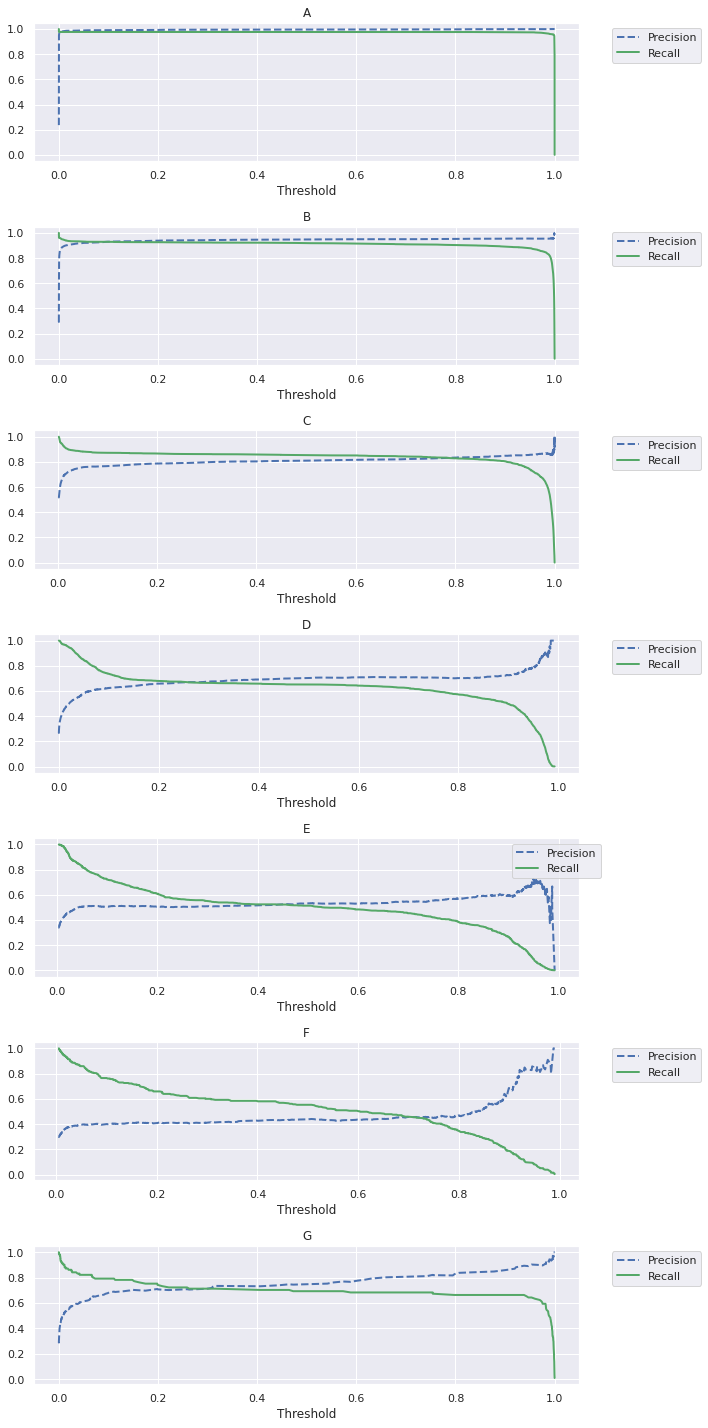

In [0]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(7,figsize=(10,20))
i=0
for name in y_test_df.columns:
    axs[i].plot(threshold[name], precision[name][:-1], "b--", label="Precision", linewidth=2)
    axs[i].plot(threshold[name], recall[name][:-1], "g-", label="Recall", linewidth=2)
    axs[i].legend(bbox_to_anchor=(1.05, 1)) # Not shown in the book
    axs[i].set_xlabel("Threshold")
    axs[i].set_title(name)         # Not shown
    axs[i].grid(True)
    plt.tight_layout()
    i+=1


Text(0.5, 1.0, 'Precision recall curve')

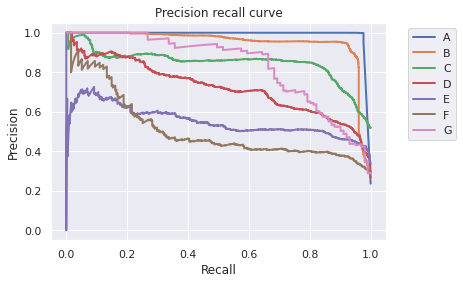

In [0]:
#plt.subplots(figsize=(6,6))
for name in y_test_df.columns:
   plt.plot(recall[name], precision[name], lw=2,label=name)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision recall curve')

Text(0.5, 1.0, 'ROC curve')

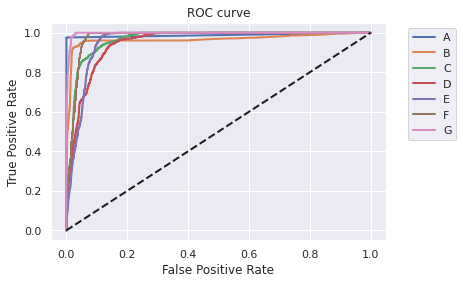

In [0]:
#plt.subplots(figsize=(6,6))
for name in y_test_df.columns:
   plt.plot(fpr[name], tpr[name], lw=2,label=name)
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [0]:
from sklearn.metrics import multilabel_confusion_matrix
confmat = multilabel_confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
target_names = ['A', 'B', 'C','D','E','F','G']
print('classification_report \n',classification_report(y_test, y_predict,target_names=target_names))

accuracy_score: 
 0.8265602322206096
confusion_matrix 
 [[[6304    8]
  [  46 1910]]

 [[5739  122]
  [ 195 2212]]

 [[6219  341]
  [ 250 1458]]

 [[6770  323]
  [ 410  765]]

 [[7301  301]
  [ 324  342]]

 [[7833  180]
  [ 114  141]]

 [[8144   23]
  [  31   70]]]
classification_report 
               precision    recall  f1-score   support

           A       1.00      0.98      0.99      1956
           B       0.95      0.92      0.93      2407
           C       0.81      0.85      0.83      1708
           D       0.70      0.65      0.68      1175
           E       0.53      0.51      0.52       666
           F       0.44      0.55      0.49       255
           G       0.75      0.69      0.72       101

   micro avg       0.84      0.83      0.84      8268
   macro avg       0.74      0.74      0.74      8268
weighted avg       0.84      0.83      0.84      8268
 samples avg       0.83      0.83      0.83      8268



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [0]:
i=0
for name in y_test.columns:
  confmat = confusion_matrix(y_test[name],y_predict[:,i])
  print(name)
  print('accuracy_score: \n',accuracy_score(y_test[name], y_predict[:,i]))
  print('confusion_matrix \n',confmat)
  print('classification_report \n',classification_report(y_test[name], y_predict[:,i]))
  i+=1

A
accuracy_score: 
 0.9934687953555879
confusion_matrix 
 [[6304    8]
 [  46 1910]]
classification_report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6312
           1       1.00      0.98      0.99      1956

    accuracy                           0.99      8268
   macro avg       0.99      0.99      0.99      8268
weighted avg       0.99      0.99      0.99      8268

B
accuracy_score: 
 0.9616594097726173
confusion_matrix 
 [[5739  122]
 [ 195 2212]]
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      5861
           1       0.95      0.92      0.93      2407

    accuracy                           0.96      8268
   macro avg       0.96      0.95      0.95      8268
weighted avg       0.96      0.96      0.96      8268

C
accuracy_score: 
 0.9285195936139332
confusion_matrix 
 [[6219  341]
 [ 250 1458]]
classification_report 
               preci

In [0]:
y_pred_probs_df=pd.DataFrame(y_pred_probs,columns=y_test.columns)
y_predict_df=pd.DataFrame(y_predict,columns=y_test.columns)

In [0]:
y_pred_probs_df.head()

,A,B,C,D,E,F,G
0,0.000011,0.000035,0.000203,0.898103,0.043442,0.000571,6.371988e-07
1,0.000011,0.000029,0.997084,0.005144,0.001320,0.000015,8.854620e-07
2,0.999959,0.000226,0.000189,0.000072,0.000073,0.000011,7.789587e-07
3,0.000011,0.999737,0.000751,0.000091,0.000097,0.000015,1.034237e-06
4,0.000011,0.999089,0.000178,0.000059,0.000061,0.000017,8.504915e-07


In [0]:
y_predict_df.head()

,A,B,C,D,E,F,G
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [0]:
# normal
name='E'
print(classification_report(y_test[name], y_predict_df[name]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7602
           1       0.53      0.51      0.52       666

    accuracy                           0.92      8268
   macro avg       0.74      0.74      0.74      8268
weighted avg       0.92      0.92      0.92      8268



In [0]:
# Add threshold
require=0.5
threshold_precision = threshold[name][np.argmax(precision[name] >= require)]
y_train_pred = (y_pred_probs_df[name] >= threshold_precision)
print(classification_report(y_test_df[name], y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.95      7602
           1       0.50      0.85      0.63       666

    accuracy                           0.92      8268
   macro avg       0.74      0.89      0.79      8268
weighted avg       0.95      0.92      0.93      8268



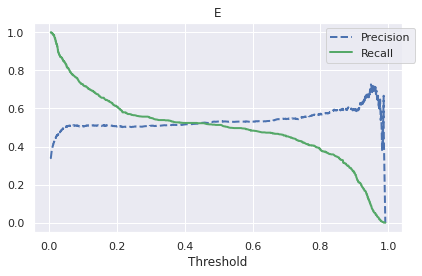

In [0]:
plt.plot(threshold[name], precision[name][:-1], "b--", label="Precision", linewidth=2)
plt.plot(threshold[name], recall[name][:-1], "g-", label="Recall", linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1)) # Not shown in the book
plt.xlabel("Threshold")
plt.title(name)         # Not shown
plt.grid(True)
plt.tight_layout()

In [0]:
# convert to f score
fscore = (2 * precision[name] * recall[name]) / (precision[name] + recall[name])
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=threshold[name][ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.991503, F-Score=nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in true_divide



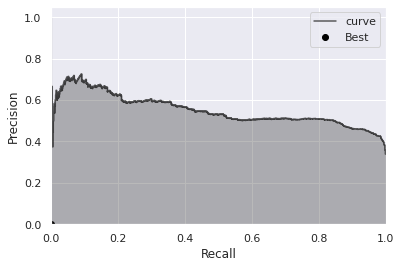

In [0]:
# plot the roc curve for the model
#no_skill = len(y_test[y_test==1]) / len(y_test)
plt.step(recall[name], precision[name], color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall[name], precision[name], step='post', alpha=0.3, color='k')
#plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[name][ix], precision[name][ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()

In [0]:
print(recall[name][ix])
print(precision[name][ix])

0.0
0.0


In [0]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr[name] * (1-fpr[name]))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=threshold[name][ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

(1291,)
Best Threshold=0.027353, G-Mean=0.933


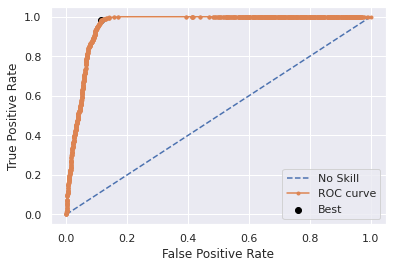

In [0]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr[name], tpr[name], marker='.', label='ROC curve')
plt.scatter(fpr[name][ix], tpr[name][ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

## LGBM tuning follow Handson -cross validate and tun on training (OK)

In [0]:
#model=OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
model=OneVsRestClassifier(LGBMClassifier(random_state=42))
#model.fit(X_train_tran, y_train_df)
#y_predict = model.predict(X_test_tran)
#y_pred_probs = model.predict_proba(X_test_tran)

In [0]:
cross_val_score(model, X_train_tran, y_train, cv=3, scoring="f1_macro")

array([0.90036501, 0.9092252 , 0.89525412])

In [0]:
y_train_pred = cross_val_predict(model, X_train_tran, y_train, cv=3)

In [0]:
y_train_pred.shape

(33068, 7)

In [0]:
y_pred_probs = cross_val_predict(model, X_train_tran, y_train, cv=3,
                             method="predict_proba")

In [0]:
y_pred_probs.shape

(33068, 7)

In [0]:
score=cross_validate(model, X_train_tran, y_train, cv=3,
                     scoring='f1_macro',return_train_score=True,
                             return_estimator=True)

In [0]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7822
           1       0.98      0.99      0.99      9625
           2       0.97      0.98      0.98      6831
           3       0.92      0.95      0.93      4701
           4       0.90      0.87      0.89      2665
           5       0.85      0.70      0.76      1018
           6       0.86      0.71      0.77       406

   micro avg       0.96      0.96      0.96     33068
   macro avg       0.92      0.88      0.90     33068
weighted avg       0.96      0.96      0.96     33068
 samples avg       0.95      0.96      0.96     33068



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [0]:
y_test_pred=score['estimator'][1].predict(X_test_tran)
y_test_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [0]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1956
           1       0.95      0.92      0.94      2407
           2       0.81      0.86      0.83      1708
           3       0.72      0.63      0.68      1175
           4       0.55      0.50      0.53       666
           5       0.42      0.55      0.47       255
           6       0.76      0.65      0.70       101

   micro avg       0.84      0.83      0.84      8268
   macro avg       0.74      0.73      0.73      8268
weighted avg       0.85      0.83      0.84      8268
 samples avg       0.83      0.83      0.83      8268



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [0]:
# For each class
precision = dict()
recall = dict()
threshold=dict()
average_precision = dict()
f1_score_dict = dict()
recall_score_dict = dict()
precision_score_dict = dict()
roc_auc_score_dict = dict()
accuracy_score_ = dict()

i=0
for name in y_test_df.columns:
  
  precision[name], recall[name], threshold[name] = precision_recall_curve(y_train[name],
                                                      y_pred_probs[:,i])
  average_precision[name] = average_precision_score(y_train[name], y_pred_probs[:,i])
  roc_auc_score_dict[name] = roc_auc_score(y_train[name], y_pred_probs[:,i])

  f1_score_dict[name] = f1_score(y_train[name], y_train_pred[:,i],average='macro')
  recall_score_dict[name] = recall_score(y_train[name], y_train_pred[:,i],average='macro')
  precision_score_dict[name] = precision_score(y_train[name], y_train_pred[:,i],average='macro')
  accuracy_score_[name] = accuracy_score(y_train[name], y_train_pred[:,i])

  i+=1
print('accuracy_score_ :',accuracy_score_)
print('average_precision :',average_precision)
print('precision_score :',precision_score_dict)
print('recall_score :',recall_score_dict)
print('f1_score :',f1_score_dict)
print('roc_auc_score :',roc_auc_score_dict)

accuracy_score_ : {'A': 0.9965223176484819, 'B': 0.9925305431232612, 'C': 0.9897181565259465, 'D': 0.980010886657796, 'E': 0.9820974960687069, 'F': 0.9867545663481311, 'G': 0.9949498004112738}
average_precision : {'A': 0.9997133792706889, 'B': 0.9994447694317798, 'C': 0.9970380098295376, 'D': 0.9801315499641613, 'E': 0.9558643032992228, 'F': 0.8469436878559976, 'G': 0.8713925229687255}
precision_score : {'A': 0.994819174691248, 'B': 0.990176929273085, 'C': 0.9833108505965628, 'D': 0.9536428700653607, 'E': 0.9453905985404178, 'F': 0.9182373557596542, 'G': 0.9265404715037223}
recall_score : {'A': 0.9955606709801683, 'B': 0.9917617897181945, 'C': 0.985399800397207, 'D': 0.9657219084103879, 'E': 0.9322369749850029, 'F': 0.8462193466127643, 'G': 0.8527134770132538}
f1_score : {'A': 0.9951892814191368, 'B': 0.9909650013273692, 'C': 0.9843508809988328, 'D': 0.9595625611836713, 'E': 0.9386934730272096, 'F': 0.8785973408364268, 'G': 0.8860375839172705}
roc_auc_score : {'A': 0.9999273170919147, 

In [0]:
df_infor=pd.DataFrame([accuracy_score_,average_precision,precision_score_dict ,
              recall_score_dict ,f1_score_dict,roc_auc_score_dict]).T
df_infor.columns = ['accuracy_score_ ', 'average_precision ','precision_score_macro',
                    'recall_score_macro ','f1_score ','roc_auc_score ']
df_infor

,accuracy_score_,average_precision,precision_score_macro,recall_score_macro,f1_score,roc_auc_score
A,0.993469,0.982027,0.994292,0.987608,0.990898,0.988014
B,0.961659,0.951713,0.957434,0.949085,0.953130,0.965893
C,0.928520,0.848063,0.885902,0.900824,0.893060,0.966517
D,0.911345,0.724513,0.823011,0.802763,0.812369,0.949447
E,0.924407,0.551676,0.744695,0.736959,0.740745,0.957273
F,0.964441,0.510324,0.712454,0.765239,0.735581,0.977342
G,0.993469,0.836205,0.874448,0.845127,0.859173,0.996901


Text(0.5, 1.0, 'Precision recall curve')

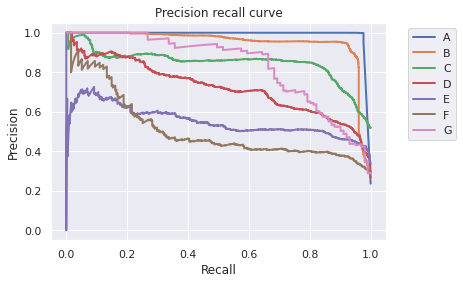

In [0]:
#plt.subplots(figsize=(6,6))
for name in y_test_df.columns:
   plt.plot(recall[name], precision[name], lw=2,label=name)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision recall curve')

Text(0.5, 1.0, 'ROC curve')

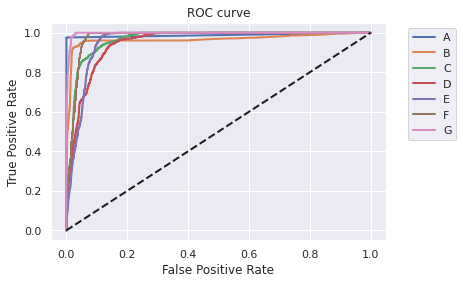

In [0]:
#plt.subplots(figsize=(6,6))
for name in y_train.columns:
   plt.plot(fpr[name], tpr[name], lw=2,label=name)
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [0]:
i=0
for name in y_train.columns:
  confmat = confusion_matrix(y_train[name],y_train_pred[:,i])
  print(name)
  print('accuracy_score: \n',accuracy_score(y_train[name], y_train_pred[:,i]))
  print('confusion_matrix \n',confmat)
  print('classification_report \n',classification_report(y_train[name], y_train_pred[:,i]))
  i+=1

A
accuracy_score: 
 0.9965223176484819
confusion_matrix 
 [[25180    66]
 [   49  7773]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25246
           1       0.99      0.99      0.99      7822

    accuracy                           1.00     33068
   macro avg       0.99      1.00      1.00     33068
weighted avg       1.00      1.00      1.00     33068

B
accuracy_score: 
 0.9925305431232612
confusion_matrix 
 [[23293   150]
 [   97  9528]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     23443
           1       0.98      0.99      0.99      9625

    accuracy                           0.99     33068
   macro avg       0.99      0.99      0.99     33068
weighted avg       0.99      0.99      0.99     33068

C
accuracy_score: 
 0.9897181565259465
confusion_matrix 
 [[26047   190]
 [  150  6681]]
classification_report 
        

In [0]:
y_pred_probs_df=pd.DataFrame(y_pred_probs,columns=y_train.columns)
y_train_pred_df=pd.DataFrame(y_train_pred,columns=y_train.columns)

In [0]:
# normal
name='F'
print(classification_report(y_train[name], y_train_pred_df[name]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     32050
           1       0.85      0.70      0.76      1018

    accuracy                           0.99     33068
   macro avg       0.92      0.85      0.88     33068
weighted avg       0.99      0.99      0.99     33068



In [0]:
# Add threshold
require=0.847 #normal
threshold_precision = threshold[name][np.argmax(precision[name] >= require)]
y_train_pred = (y_pred_probs_df[name] >= threshold_precision)
print(classification_report(y_train[name], y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32050
           1       0.97      0.21      0.34      1018

    accuracy                           0.98     33068
   macro avg       0.97      0.60      0.66     33068
weighted avg       0.98      0.98      0.97     33068



In [0]:
# Add threshold
require=0.295109 # change by optimize f1
#require=0.83
threshold_precision = threshold[name][np.argmax(precision[name] >= require)]
y_train_pred = (y_pred_probs_df[name] >= threshold_precision)
print(classification_report(y_train[name], y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     32050
           1       0.33      0.99      0.49      1018

    accuracy                           0.94     33068
   macro avg       0.66      0.96      0.73     33068
weighted avg       0.98      0.94      0.95     33068



In [0]:
# Add threshold
require=0.001264 # change by optimize gmeans
threshold_precision = threshold[name][np.argmax(precision[name] >= require)]
y_train_pred = (y_pred_probs_df[name] >= threshold_precision)
print(classification_report(y_train[name], y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     32050
           1       0.33      0.99      0.49      1018

    accuracy                           0.94     33068
   macro avg       0.66      0.96      0.73     33068
weighted avg       0.98      0.94      0.95     33068



In [0]:
# convert to f score
fscore = (2 * precision[name] * recall[name]) / (precision[name] + recall[name])
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=threshold[name][ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.054832, F-Score=0.545


In [0]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr[name] * (1-fpr[name]))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=threshold[name][ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

(568,)
Best Threshold=0.062942, G-Mean=0.962


Use model from cross validation to predict X_test

In [0]:
model_cross_val=score['estimator'][1]

In [0]:
y_test_pred=model_cross_val.predict(X_test_tran)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1956
           1       0.95      0.92      0.94      2407
           2       0.81      0.86      0.83      1708
           3       0.72      0.63      0.68      1175
           4       0.55      0.50      0.53       666
           5       0.42      0.55      0.47       255
           6       0.76      0.65      0.70       101

   micro avg       0.84      0.83      0.84      8268
   macro avg       0.74      0.73      0.73      8268
weighted avg       0.85      0.83      0.84      8268
 samples avg       0.83      0.83      0.83      8268



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



# Deep learning multiclassification (label one hot)

## Preprocess data

In [153]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y_one_hot, test_size=0.2, 
                                    random_state=2018, stratify=y_one_hot)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(41336, 101)
(26454, 101)
(6614, 101)
(8268, 101)


In [154]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(26454, 7)
(6614, 7)
(8268, 7)


In [0]:
for name in y_train.columns:
  print(y_train[name].value_counts(normalize=True))
  print(y_train[name].value_counts())

In [0]:
for name in y_val.columns:
  print(y_val[name].value_counts(normalize=True))
  print(y_val[name].value_counts())

In [0]:
for name in y_test.columns:
  print(y_val[name].value_counts(normalize=True))
  print(y_val[name].value_counts())

Feature transform

In [0]:
sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train)
X_val_tran=sc.fit_transform(X_val)
X_test_tran=sc.fit_transform(X_test)
X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
X_val_tran=pd.DataFrame(X_val_tran,columns=X_val.columns)
X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)

## Base ANN model

In [0]:
def plot_loss(history, label):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               #color=colors[n], 
               label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          #color=colors[n], 
          label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

In [157]:
numlabel=y_train.shape[1]
numlabel

7

In [0]:
def make_model():
  tf.random.set_seed(42)
  np.random.seed(42)
  METRICS = [
        keras.metrics.TruePositives(name='tp'),
        keras.metrics.FalsePositives(name='fp'),
        keras.metrics.TrueNegatives(name='tn'),
        keras.metrics.FalseNegatives(name='fn'), 
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc'),
  ]

  DROPOUT = 0.2
  # define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
  #build the model
  #----input-------#
  model =Sequential()
  model.add(Dense(60,input_dim=X_train_tran.shape[1],
        activation='relu'))
  #----hiden layer-------#
  model.add(Dropout(DROPOUT))
  model.add(Dense(40,
            activation='relu',))

  model.add(Dropout(DROPOUT))
  model.add(Dense(20,
            activation='relu',))
  model.add(Dropout(DROPOUT))
  #----output-------#
  model.add(Dense(numlabel,activation='softmax'))  #binary: sigmoid. multi: softmax
  #model.summary()
  # compiling the model
  model.compile(optimizer='Adam', 
                #optimizer=keras.optimizers.SGD(lr=1e-3),
                loss='categorical_crossentropy',
                metrics=METRICS)
  return model

In [0]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_accuracy", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
#training the moodel
model=make_model()
result=model.fit(X_train_tran, y_train,
        batch_size=BATCH_SIZE, epochs=EPOCHS,
        callbacks=callbacks,
        verbose=0,
        #class_weight = 'auto',
        validation_data=(X_val_tran, y_val))

In [0]:
#evalute the model
#model.evaluate(X_test_tran, y_test,batch_size=BATCH_SIZE)

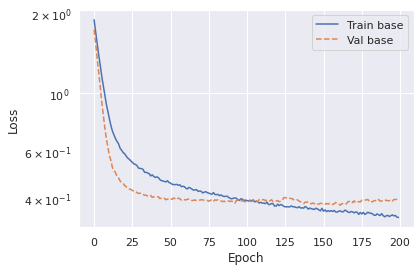

In [202]:
plot_loss(result,'base')

### Evaluate Model

In [203]:
predictions=model.predict_classes(X_test_tran)
y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test_labels,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1956
           1       0.92      0.95      0.93      2407
           2       0.85      0.80      0.82      1708
           3       0.67      0.73      0.70      1175
           4       0.59      0.52      0.55       666
           5       0.47      0.62      0.53       255
           6       0.90      0.19      0.31       101

    accuracy                           0.84      8268
   macro avg       0.77      0.68      0.69      8268
weighted avg       0.84      0.84      0.84      8268



In [169]:
set(predictions)

{0, 1, 2, 3, 4, 5, 6}

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [171]:
cnf_matrix=confusion_matrix(y_test_labels,predictions)
cnf_matrix

array([[1908,   48,    0,    0,    0,    0,    0],
       [  54, 2272,   80,    0,    1,    0,    0],
       [   0,  142, 1367,  199,    0,    0,    0],
       [   0,    2,  156,  890,  127,    0,    0],
       [   0,    0,    1,  227,  329,  109,    0],
       [   0,    0,    0,    4,   89,  159,    3],
       [   0,    0,    0,    0,    3,   74,   24]])

Normalized confusion matrix


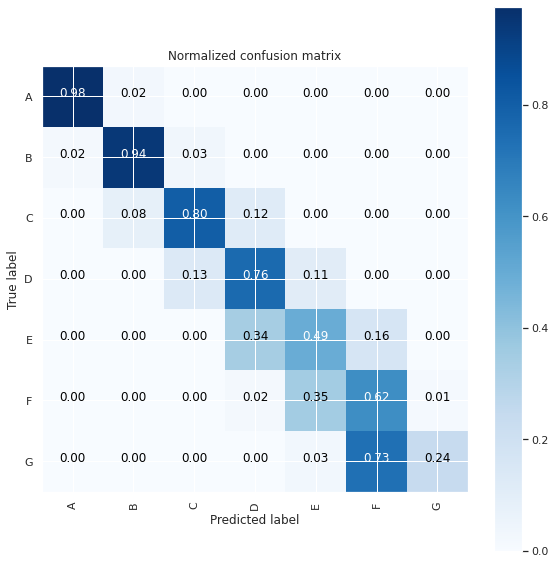

In [172]:
# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(8, 8, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=y_test.columns, normalize=True,
                      title='Normalized confusion matrix')

In [173]:
predictions_df=pd.get_dummies(predictions)
i=0
for name in y_test.columns:
  confmat = confusion_matrix(y_test[name],predictions_df[i])
  print(name)
  #print('accuracy_score: \n',accuracy_score(y_test[name], predictions_df[i]))
  #print('confusion_matrix \n',confmat)
  print('classification_report \n',classification_report(y_test[name], predictions_df[i]))
  i+=1

A
classification_report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6312
           1       0.97      0.98      0.97      1956

    accuracy                           0.99      8268
   macro avg       0.98      0.98      0.98      8268
weighted avg       0.99      0.99      0.99      8268

B
classification_report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      5861
           1       0.92      0.94      0.93      2407

    accuracy                           0.96      8268
   macro avg       0.95      0.96      0.95      8268
weighted avg       0.96      0.96      0.96      8268

C
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      6560
           1       0.85      0.80      0.83      1708

    accuracy                           0.93      8268
   macro avg       0.90      0.88      0.89      8

### Precision, recall, threshold

In [174]:
# making prediction
predictions_prob = model.predict(X_test_tran)
print(predictions_prob.shape)

(8268, 7)


In [0]:
# For each class
precision = dict()
recall = dict()
threshold=dict()
fpr = dict()
tpr = dict()
thresholds_roc=dict()

average_precision = dict()
f1_score_dict = dict()
recall_score_dict = dict()
precision_score_dict = dict()
roc_auc_score_dict = dict()
accuracy_score_ = dict()

i=0
for name in y_test.columns:
  # y test and y_predict_prob
  precision[name], recall[name], threshold[name] = precision_recall_curve(y_test[name],
                                                      predictions_prob[:,i])
  fpr[name], tpr[name], thresholds_roc[name] = roc_curve(y_test[name],
                                                      predictions_prob[:,i])
  average_precision[name] = average_precision_score(y_test[name], predictions_prob[:,i])
  roc_auc_score_dict[name] = roc_auc_score(y_test[name], predictions_prob[:,i])

  # y test and y_predict
  f1_score_dict[name] = f1_score(y_test[name], predictions_df[i],average='macro')
  recall_score_dict[name] = recall_score(y_test[name], predictions_df[i],average='macro')
  precision_score_dict[name] = precision_score(y_test[name], predictions_df[i],average='macro')
  accuracy_score_[name] = accuracy_score(y_test[name], predictions_df[i])

  i+=1
#print('accuracy_score_ :',accuracy_score_)
#print('average_precision :',average_precision)
#print('precision_score :',precision_score_dict)
#print('recall_score :',recall_score_dict)
#print('f1_score :',f1_score_dict)
#print('roc_auc_score :',roc_auc_score_dict)

In [176]:
df_infor=pd.DataFrame([accuracy_score_,average_precision,precision_score_dict ,
              recall_score_dict ,f1_score_dict,roc_auc_score_dict]).T
df_infor.columns = ['accuracy_score_ ', 'average_precision ','precision_score_macro',
                    'recall_score_macro ','f1_score ','roc_auc_score ']
df_infor

,accuracy_score_,average_precision,precision_score_macro,recall_score_macro,f1_score,roc_auc_score
A,0.987663,0.997014,0.982433,0.983452,0.982941,0.999013
B,0.960450,0.981832,0.949409,0.955577,0.952418,0.992834
C,0.930092,0.917144,0.900537,0.882112,0.890887,0.975680
D,0.913522,0.700006,0.816612,0.848412,0.831252,0.956916
E,0.932632,0.574469,0.777806,0.732527,0.752604,0.960327
F,0.966255,0.447723,0.726400,0.800346,0.757580,0.974992
G,0.990324,0.623466,0.939773,0.618628,0.685062,0.991396


Text(0.5, 1.0, 'Precision recall curve')

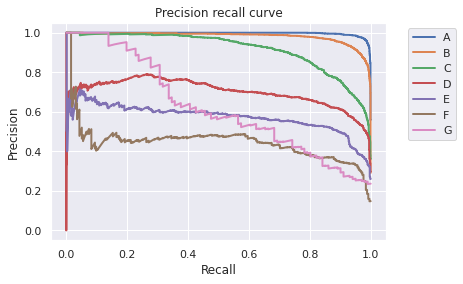

In [177]:
#plt.subplots(figsize=(6,6))
for name in y_test.columns:
   plt.plot(recall[name], precision[name], lw=2,label=name)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision recall curve')

Text(0.5, 1.0, 'ROC curve')

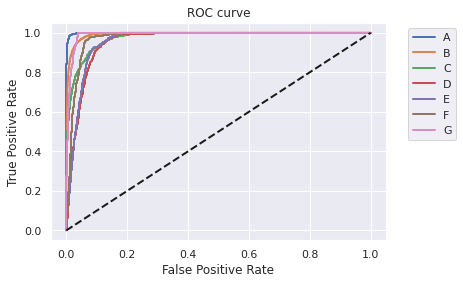

In [178]:
#plt.subplots(figsize=(6,6))
for name in y_test.columns:
   plt.plot(fpr[name], tpr[name], lw=2,label=name)
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

## SMOTE method

In [0]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss,RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN,CondensedNearestNeighbour,OneSidedSelection,NeighbourhoodCleaningRule
from imblearn.over_sampling import ADASYN,SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

In [0]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y_one_hot)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

In [276]:
Counter(y_train)

Counter({'A': 6257,
         'B': 7700,
         'C': 5465,
         'D': 3761,
         'E': 2132,
         'F': 814,
         'G': 325})

In [277]:
method=SMOTE()
#Transform
print(name)
X_train_transform, y_train_transform=method.fit_sample(X_train,y_train)
Counter(y_train_transform)

G


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

Counter({'A': 7700,
         'B': 7700,
         'C': 7700,
         'D': 7700,
         'E': 7700,
         'F': 7700,
         'G': 7700})

In [278]:
print(X_train_transform.shape)
print(y_train_transform.shape)

(53900, 101)
(53900,)


In [0]:
# Transform data:
sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train_transform)
X_val_tran=sc.fit_transform(X_val)
X_test_tran=sc.fit_transform(X_test)
X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
X_val_tran=pd.DataFrame(X_val_tran,columns=X_val.columns)
X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)
y_train=pd.get_dummies(y_train_transform)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [281]:
for name in y_train.columns:
  print(y_train[name].value_counts())

0    46200
1     7700
Name: A, dtype: int64
0    46200
1     7700
Name: B, dtype: int64
0    46200
1     7700
Name: C, dtype: int64
0    46200
1     7700
Name: D, dtype: int64
0    46200
1     7700
Name: E, dtype: int64
0    46200
1     7700
Name: F, dtype: int64
0    46200
1     7700
Name: G, dtype: int64


In [282]:
EPOCHS = 200
BATCH_SIZE = 1000
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
#training the moodel
model=make_model()
result=model.fit(X_train_tran, y_train,
        batch_size=BATCH_SIZE, epochs=EPOCHS,
        callbacks=callbacks,
        verbose=0,
        #class_weight = 'auto',
        validation_data=(X_val_tran, y_val))

predictions=model.predict_classes(X_test_tran)
y_test_labels = np.argmax(y_test.values, axis =1)

t1=time.time()
print('time',t1-t0)
print(classification_report(y_test_labels,predictions))

time 28.614915132522583
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      1956
           1       0.43      0.15      0.22      2407
           2       0.02      0.02      0.02      1708
           3       0.02      0.02      0.02      1175
           4       0.01      0.02      0.02       666
           5       0.03      0.10      0.04       255
           6       0.10      0.96      0.18       101

    accuracy                           0.25      8268
   macro avg       0.23      0.29      0.19      8268
weighted avg       0.37      0.25      0.28      8268



## Multiclass oversampling

In [0]:
!pip install smote_variants

In [0]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y_label_encoder, test_size=0.2, 
                                    random_state=2018, stratify=y_one_hot)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

In [363]:
X_train.shape

(26454, 101)

In [364]:
y_train

25358    2
57       1
21347    1
11599    0
4054     0
        ..
15467    3
6528     1
10231    3
31621    1
3877     1
Length: 26454, dtype: int64

In [365]:
type(y_train)

pandas.core.series.Series

In [366]:
y_train.to_numpy()

array([2, 1, 1, ..., 3, 1, 1])

In [367]:
Counter(y_train)

Counter({0: 6257, 1: 7700, 2: 5465, 3: 3761, 4: 2132, 5: 814, 6: 325})

In [368]:
X_train.to_numpy()

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.47624e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 5.80394e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 7.14800e+01],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.12612e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.72777e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.44614e+03]])

In [369]:
import smote_variants as sv
# Instantiating the MSMOTE class
oversampler= sv.MulticlassOversampling(sv.distance_SMOTE())
#Transform
X_train_transform, y_train_transform=oversampler.sample(X_train.to_numpy(),y_train.to_numpy())
Counter(y_train_transform)

2020-06-14 12:43:33,474:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-06-14 12:43:33,498:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-06-14 12:43:33,519:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-06-14 12:43:34,253:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-06-14 12:43:34,278:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.22496225465525918, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-06-14 12:43:35,038:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-06-14 12:43:35,061:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2036816795077305, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-06-14 12:43:35,620:INFO:MulticlassOversampling: Sampling minority class with la

Counter({0: 7700, 1: 7700, 2: 7700, 3: 7700, 4: 7700, 5: 7700, 6: 7699})

In [0]:
# Transform data:
sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train_transform)
X_val_tran=sc.fit_transform(X_val)
X_test_tran=sc.fit_transform(X_test)
X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
X_val_tran=pd.DataFrame(X_val_tran,columns=X_val.columns)
X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)
y_train=pd.get_dummies(y_train_transform)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [371]:
EPOCHS = 200
BATCH_SIZE = 1000
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
#training the moodel
model=make_model()
result=model.fit(X_train_tran, y_train,
        batch_size=BATCH_SIZE, epochs=EPOCHS,
        callbacks=callbacks,
        verbose=0,
        #class_weight = 'auto',
        validation_data=(X_val_tran, y_val))

predictions=model.predict_classes(X_test_tran)
y_test_labels = np.argmax(y_test.values, axis =1)

t1=time.time()
print('time',t1-t0)
print(classification_report(y_test_labels,predictions))

time 5729.240108013153
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1956
           1       0.48      0.17      0.25      2407
           2       0.02      0.02      0.02      1708
           3       0.02      0.02      0.02      1175
           4       0.01      0.02      0.02       666
           5       0.02      0.09      0.04       255
           6       0.10      0.94      0.18       101

    accuracy                           0.25      8268
   macro avg       0.24      0.29      0.20      8268
weighted avg       0.39      0.25      0.29      8268



## Try all sampling method

In [0]:
list_method={
# Under sampling
'NearMiss':NearMiss(),
#'RandomUnderSampler':RandomUnderSampler(random_state=0),
#'RepeatedEditedNearestNeighbours':RepeatedEditedNearestNeighbours(random_state=0), # Very long
#'AllKNN':AllKNN(random_state=0),
#'CondensedNearestNeighbour':CondensedNearestNeighbour(random_state=0),
#'OneSidedSelection':OneSidedSelection(random_state=0),
#'NeighbourhoodCleaningRule':NeighbourhoodCleaningRule(random_state=0),

# Over sampling

'RandomOverSampler':RandomOverSampler(random_state=0),
'SMOTE':SMOTE(random_state=0),
#'ADASYN':ADASYN(random_state=0),
'BorderlineSMOTE-1':BorderlineSMOTE(random_state=0, kind='borderline-1'),
'BorderlineSMOTE-2':BorderlineSMOTE(random_state=0, kind='borderline-2'),
'SVMSMOTE':SVMSMOTE(random_state=0),
}

In [293]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y_one_hot)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
EPOCHS = 200
BATCH_SIZE = 1000
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
for name,method in list_method.items():
  X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y_one_hot)

  X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

  #Transform
  print(name)
  X_train_transform, y_train_transform=method.fit_sample(X_train,y_train)
  #Counter(y_train_transform)

  # Transform data:
  sc=StandardScaler()
  X_train_tran=sc.fit_transform(X_train_transform)
  X_val_tran=sc.fit_transform(X_val)
  X_test_tran=sc.fit_transform(X_test)
  X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
  X_val_tran=pd.DataFrame(X_val_tran,columns=X_val.columns)
  X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)

  y_train=pd.get_dummies(y_train_transform)
  y_val=pd.get_dummies(y_val)
  y_test=pd.get_dummies(y_test)


  t0=time.time()
  model=make_model()
  result=model.fit(X_train_tran, y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          callbacks=callbacks,
          verbose=0,
          #class_weight = 'auto',
          validation_data=(X_val_tran, y_val))

  predictions=model.predict_classes(X_test_tran)
  y_test_labels = np.argmax(y_test.values, axis =1)

  t1=time.time()
  print('time',t1-t0)
  print(classification_report(y_test_labels,predictions))

NearMiss


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 5.133871555328369
              precision    recall  f1-score   support

           0       0.55      0.18      0.27      1956
           1       0.33      0.17      0.22      2407
           2       0.17      0.21      0.19      1708
           3       0.19      0.06      0.09      1175
           4       0.16      0.16      0.16       666
           5       0.02      0.01      0.01       255
           6       0.03      0.89      0.05       101

    accuracy                           0.17      8268
   macro avg       0.21      0.24      0.14      8268
weighted avg       0.30      0.17      0.19      8268

RandomOverSampler


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 10.397747039794922
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1956
           1       0.39      0.14      0.21      2407
           2       0.02      0.02      0.02      1708
           3       0.02      0.02      0.02      1175
           4       0.01      0.02      0.01       666
           5       0.02      0.06      0.03       255
           6       0.09      0.96      0.16       101

    accuracy                           0.23      8268
   macro avg       0.22      0.28      0.18      8268
weighted avg       0.36      0.23      0.27      8268

SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 11.014243125915527
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1956
           1       0.44      0.16      0.24      2407
           2       0.02      0.02      0.02      1708
           3       0.02      0.02      0.02      1175
           4       0.01      0.02      0.02       666
           5       0.02      0.09      0.04       255
           6       0.10      0.94      0.18       101

    accuracy                           0.25      8268
   macro avg       0.23      0.29      0.19      8268
weighted avg       0.38      0.25      0.28      8268

BorderlineSMOTE-1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 11.622243404388428
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      1956
           1       0.41      0.14      0.21      2407
           2       0.02      0.02      0.02      1708
           3       0.02      0.02      0.02      1175
           4       0.02      0.04      0.03       666
           5       0.06      0.27      0.09       255
           6       0.12      0.84      0.21       101

    accuracy                           0.25      8268
   macro avg       0.24      0.30      0.21      8268
weighted avg       0.37      0.25      0.28      8268

BorderlineSMOTE-2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 11.951101064682007
              precision    recall  f1-score   support

           0       1.00      0.67      0.81      1956
           1       0.38      0.16      0.23      2407
           2       0.03      0.02      0.03      1708
           3       0.02      0.03      0.02      1175
           4       0.03      0.06      0.04       666
           5       0.06      0.28      0.10       255
           6       0.11      0.83      0.19       101

    accuracy                           0.24      8268
   macro avg       0.23      0.29      0.20      8268
weighted avg       0.36      0.24      0.27      8268

SVMSMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 11.593533039093018
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1956
           1       0.50      0.21      0.30      2407
           2       0.02      0.02      0.02      1708
           3       0.04      0.06      0.05      1175
           4       0.09      0.20      0.13       666
           5       0.08      0.22      0.12       255
           6       0.10      0.75      0.18       101

    accuracy                           0.28      8268
   macro avg       0.26      0.31      0.24      8268
weighted avg       0.41      0.28      0.32      8268



## Class weight

In [348]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y_one_hot, test_size=0.2, 
                                    random_state=2018, stratify=y_one_hot)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train)
X_val_tran=sc.fit_transform(X_val)
X_test_tran=sc.fit_transform(X_test)
X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
X_val_tran=pd.DataFrame(X_val_tran,columns=X_val.columns)
X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)

(41336, 101)
(26454, 101)
(6614, 101)
(8268, 101)


In [349]:
from sklearn.utils import class_weight
class_weights_a = class_weight.compute_class_weight('balanced',
                                                 np.unique(y),
                                                 y)
class_weights_a

array([ 0.60392134,  0.49078647,  0.6915497 ,  1.00495964,  1.77278381,
        4.63876108, 11.64722457])

In [350]:
weights=[]
for name in y_train.columns:
  
  class_weights_a = class_weight.compute_class_weight('balanced',
                                                      np.unique(y_train[name]),y_train[name])
  weights.append(class_weights_a)
  print(class_weights_a)

[0.65489924 2.11395237]
[0.70528954 1.71779221]
[0.63018724 2.42031107]
[0.58286696 3.51688381]
[0.54382863 6.20403377]
[ 0.51587363 16.24938575]
[ 0.50621914 40.69846154]


In [327]:
weights[2][1]

2.4203110704483075

In [321]:
type(class_weights_a)

numpy.ndarray

In [328]:
class_weights = np.zeros((X_train_tran.shape[0], y_train.shape[1]))
class_weights[:, 0] += weights[0][1]
class_weights[:, 1] += weights[1][1]
class_weights[:, 2] += weights[2][1]
class_weights[:, 3] += weights[3][1]
class_weights[:, 4] += weights[4][1]
class_weights[:, 5] += weights[5][1]
class_weights[:, 6] += weights[6][1]
print(class_weights.shape)
class_weights

(26454, 7)


array([[ 2.11395237,  1.71779221,  2.42031107, ...,  6.20403377,
        16.24938575, 40.69846154],
       [ 2.11395237,  1.71779221,  2.42031107, ...,  6.20403377,
        16.24938575, 40.69846154],
       [ 2.11395237,  1.71779221,  2.42031107, ...,  6.20403377,
        16.24938575, 40.69846154],
       ...,
       [ 2.11395237,  1.71779221,  2.42031107, ...,  6.20403377,
        16.24938575, 40.69846154],
       [ 2.11395237,  1.71779221,  2.42031107, ...,  6.20403377,
        16.24938575, 40.69846154],
       [ 2.11395237,  1.71779221,  2.42031107, ...,  6.20403377,
        16.24938575, 40.69846154]])

In [337]:
class_weights[0]

array([ 2.11395237,  1.71779221,  2.42031107,  3.51688381,  6.20403377,
       16.24938575, 40.69846154])

In [0]:
class_weights_new=[2.11395237,  1.71779221,  2.42031107,  3.51688381,  6.20403377,
       16.24938575, 40.69846154]

In [343]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_accuracy", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
#training the moodel
model=make_model()
result=model.fit(X_train_tran, y_train,
        batch_size=BATCH_SIZE, epochs=EPOCHS,
        callbacks=callbacks,
        verbose=0,
        class_weight = class_weights_new,
        validation_data=(X_val_tran, y_val))

predictions=model.predict_classes(X_test_tran)
y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test_labels,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1956
           1       0.92      0.95      0.93      2407
           2       0.86      0.80      0.83      1708
           3       0.68      0.74      0.71      1175
           4       0.58      0.52      0.55       666
           5       0.46      0.60      0.52       255
           6       0.85      0.22      0.35       101

    accuracy                           0.84      8268
   macro avg       0.76      0.68      0.69      8268
weighted avg       0.84      0.84      0.84      8268



In [347]:
weights

[array([0.65489924, 2.11395237]),
 array([0.70528954, 1.71779221]),
 array([0.63018724, 2.42031107]),
 array([0.58286696, 3.51688381]),
 array([0.54382863, 6.20403377]),
 array([ 0.51587363, 16.24938575]),
 array([ 0.50621914, 40.69846154])]

In [351]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_accuracy", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
#training the moodel
model=make_model()
result=model.fit(X_train_tran, y_train,
        batch_size=BATCH_SIZE, epochs=EPOCHS,
        callbacks=callbacks,
        verbose=0,
        class_weight = weights,
        validation_data=(X_val_tran, y_val))

predictions=model.predict_classes(X_test_tran)
y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test_labels,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1956
           1       0.92      0.95      0.93      2407
           2       0.86      0.79      0.83      1708
           3       0.67      0.76      0.71      1175
           4       0.59      0.53      0.56       666
           5       0.48      0.57      0.52       255
           6       0.88      0.22      0.35       101

    accuracy                           0.84      8268
   macro avg       0.77      0.68      0.70      8268
weighted avg       0.84      0.84      0.84      8268



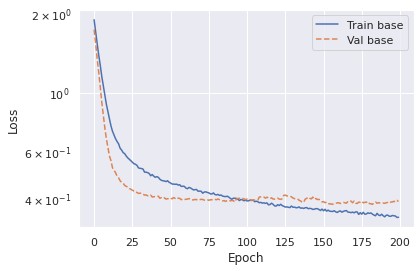

In [344]:
plot_loss(result,'base')

# Deep learning multiclassification (label encoder not done)

In [136]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y_label_encoder, test_size=0.2, 
                                    random_state=2018, stratify=y_label_encoder)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(41336, 101)
(26454, 101)
(6614, 101)
(8268, 101)


In [137]:
y_train

7181     2
21279    1
27590    1
5380     0
358      0
        ..
28145    3
32253    1
29753    3
1022     1
37000    1
Length: 26454, dtype: int64

In [0]:
sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train)
X_val_tran=sc.fit_transform(X_val)
X_test_tran=sc.fit_transform(X_test)
X_train_tran=pd.DataFrame(X_train_tran,columns=X_train.columns)
X_val_tran=pd.DataFrame(X_val_tran,columns=X_val.columns)
X_test_tran=pd.DataFrame(X_test_tran,columns=X_test.columns)

In [140]:
numlabel=len(set(y_train))
numlabel

7

In [149]:
tf.random.set_seed(42)
np.random.seed(42)
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

DROPOUT = 0.2
# define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
#build the model
#----input-------#
model =Sequential()
model.add(Dense(60,input_dim=X_train_tran.shape[1],
      activation='relu'))
#----hiden layer-------#
model.add(Dropout(DROPOUT))
model.add(Dense(40,
          activation='relu',))

model.add(Dropout(DROPOUT))
model.add(Dense(20,
   		    activation='relu',))
model.add(Dropout(DROPOUT))
#----output-------#
model.add(Dense(1,activation='softmax'))  #binary: sigmoid. multi: softmax
model.summary()
# compiling the model
model.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=METRICS)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 60)                6120      
_________________________________________________________________
dropout_37 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 40)                2440      
_________________________________________________________________
dropout_38 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_39 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [152]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]
#training the moodel
result=model.fit(X_train_tran, y_train,
        batch_size=BATCH_SIZE, epochs=EPOCHS,
        callbacks=callbacks,
        verbose=0,
        #class_weight = 'auto',
        validation_data=(X_val_tran, y_val)
        )

InvalidArgumentError: ignored

In [0]:
predictions=model.predict_classes(X_test_tran)
y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test_labels,predictions))